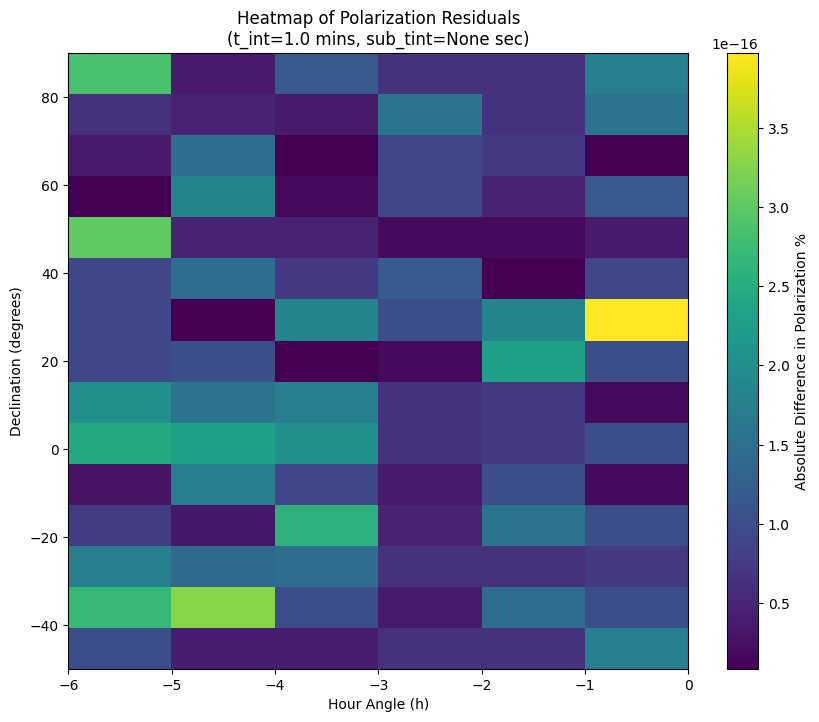

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes


# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees
observation_date = "2460614.91667"  # JD for 10/31/2024
Q_injected, U_injected = 0.01, 0  # Injected Stokes parameters
noise_percentage = 0
matrix_noise = 0
t_int, sub_tint = 60, None  # Set t_int (5 minutes) and sub_tint (1 second)

# Grid parameters
hour_angles = np.arange(-6, 0, 1)  # Hour angle from -6 to +6 hours
declinations = np.arange(-50, 91, 10)  # Declination from -50 to +90 degrees
residuals = np.zeros((len(declinations), len(hour_angles)))

# Run calculations over grid
for i, dec in enumerate(declinations):
    for j, ha in enumerate(hour_angles):
        # Calculate hour angle in degrees
        H_deg = ha * 15
        
        # Calculate altitude and parallactic angle for each point
        altitude = angles.calculate_altitude(phi=observer_latitude, delta=dec, H=H_deg)
        parallactic_angle = angles.calculate_parallactic_angle(ra=0.0, dec=dec, ut="10:00:00", 
                                                        jd_str=observation_date, observer_latitude=observer_latitude, 
                                                        observer_longitude=observer_longitude)

        # Simulate using matrix inversion for each grid point
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=0, dec=dec, observer_latitude=observer_latitude, observer_longitude=observer_longitude,
            jd_str=observation_date, ut_start="10:00:00", t_int=t_int, Q=Q_injected, U=U_injected,
            delta_HWP=0.5, noise_percentage=noise_percentage, include_V=False, 
            sub_tint=sub_tint, use_sum=False, matrix_noise=matrix_noise,
            hour_angle = ha
        )
        
        # Calculate polarization difference (residuals)
        retrieved_polarization = np.sqrt(S_in_retrieved[1]**2 + S_in_retrieved[2]**2)
        injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
        residuals[i, j] = np.abs(injected_polarization - retrieved_polarization)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(residuals, extent=[-6, 0, -50, 90], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Absolute Difference in Polarization %')
plt.xlabel('Hour Angle (h)')
plt.ylabel('Declination (degrees)')
plt.title(f'Heatmap of Polarization Residuals\n(t_int={t_int/60} mins, sub_tint={sub_tint} sec)')
plt.show()


# Adding sub integration times

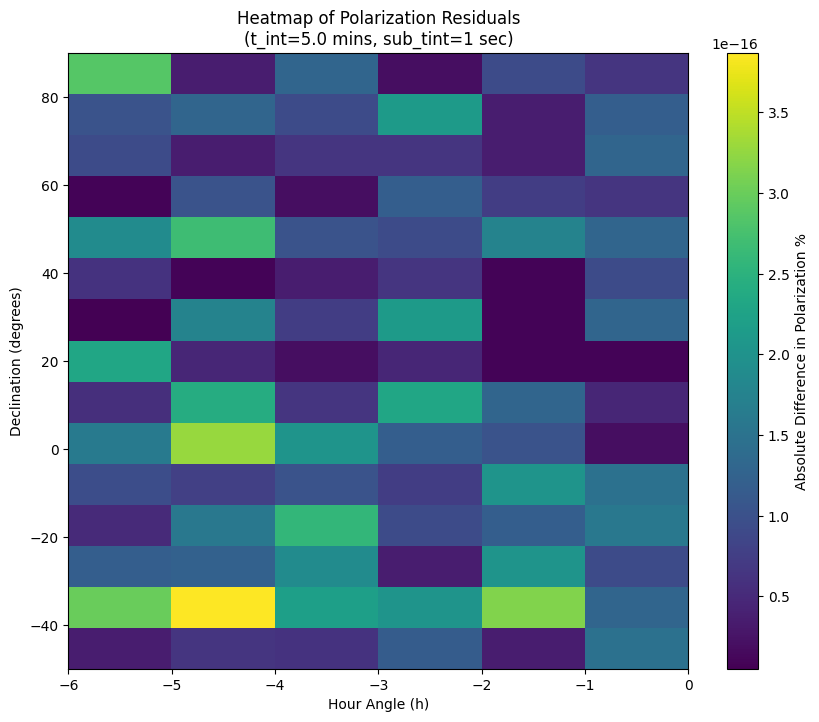

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes


# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees
observation_date = "2460614.91667"  # JD for 10/31/2024
Q_injected, U_injected = 0.01, 0  # Injected Stokes parameters
noise_percentage = 0
matrix_noise = 0
t_int, sub_tint = 1800, 1  # Set t_int (5 minutes) and sub_tint (1 second)

# Grid parameters
hour_angles = np.arange(-6, 0, 1)  # Hour angle from -6 to +6 hours
declinations = np.arange(0, 81, 10)  # Declination from -50 to +90 degrees
residuals = np.zeros((len(declinations), len(hour_angles)))

# Run calculations over grid
for i, dec in enumerate(declinations):
    for j, ha in enumerate(hour_angles):
        # Calculate hour angle in degrees
        H_deg = ha * 15
        
        # Calculate altitude and parallactic angle for each point
        altitude = angles.calculate_altitude(phi=observer_latitude, delta=dec, H=H_deg)
        parallactic_angle = angles.calculate_parallactic_angle(ra=0.0, dec=dec, ut="10:00:00", 
                                                        jd_str=observation_date, observer_latitude=observer_latitude, 
                                                        observer_longitude=observer_longitude)

        # Simulate using matrix inversion for each grid point
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=0, dec=dec, observer_latitude=observer_latitude, observer_longitude=observer_longitude,
            jd_str=observation_date, ut_start="10:00:00", t_int=t_int, Q=Q_injected, U=U_injected,
            delta_HWP=0.5, noise_percentage=noise_percentage, include_V=False, 
            sub_tint=sub_tint, use_sum=False, matrix_noise=matrix_noise,
            hour_angle = ha
        )
        
        # Calculate polarization difference (residuals)
        retrieved_polarization = np.sqrt(S_in_retrieved[1]**2 + S_in_retrieved[2]**2)
        injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
        residuals[i, j] = np.abs(injected_polarization - retrieved_polarization)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(residuals, extent=[-6, 0, -50, 90], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Absolute Difference in Polarization %')
plt.xlabel('Hour Angle (h)')
plt.ylabel('Declination (degrees)')
plt.title(f'Heatmap of Polarization Residuals\n(t_int={t_int/60} mins, sub_tint={sub_tint} sec)')
plt.show()


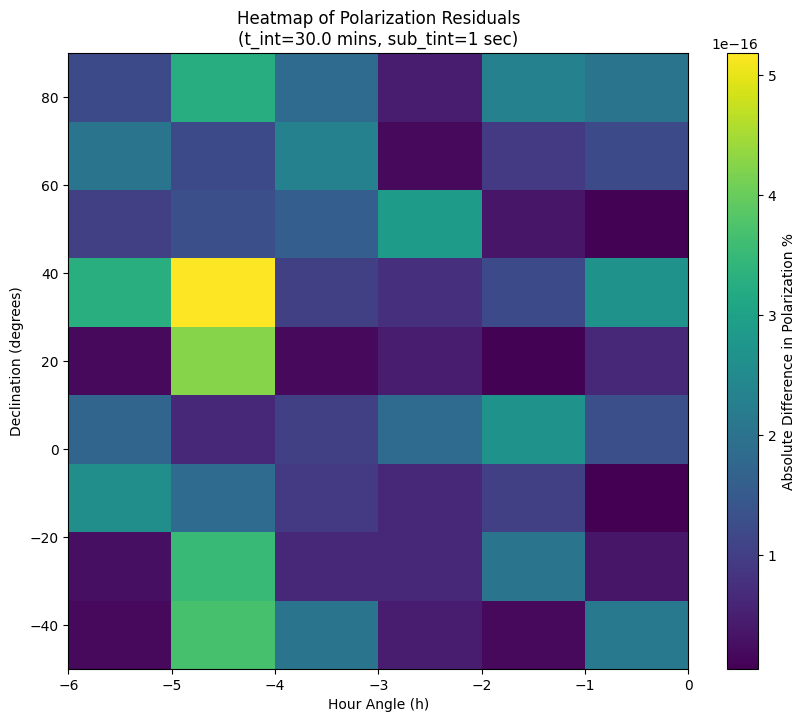

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes


# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees
observation_date = "2460614.91667"  # JD for 10/31/2024
Q_injected, U_injected = 0.01, 0  # Injected Stokes parameters
noise_percentage = 0
matrix_noise = 0
t_int, sub_tint = 1800, 1  # Set t_int (5 minutes) and sub_tint (1 second)

# Grid parameters
hour_angles = np.arange(-6, 0, 1)  # Hour angle from -6 to +6 hours
declinations = np.arange(0, 81, 10)  # Declination from -50 to +90 degrees
residuals = np.zeros((len(declinations), len(hour_angles)))

# Run calculations over grid
for i, dec in enumerate(declinations):
    for j, ha in enumerate(hour_angles):
        # Calculate hour angle in degrees
        H_deg = ha * 15
        
        # Calculate altitude and parallactic angle for each point
        altitude = angles.calculate_altitude(phi=observer_latitude, delta=dec, H=H_deg)
        parallactic_angle = angles.calculate_parallactic_angle(ra=0.0, dec=dec, ut="10:00:00", 
                                                        jd_str=observation_date, observer_latitude=observer_latitude, 
                                                        observer_longitude=observer_longitude)

        # Simulate using matrix inversion for each grid point
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=0, dec=dec, observer_latitude=observer_latitude, observer_longitude=observer_longitude,
            jd_str=observation_date, ut_start="10:00:00", t_int=t_int, Q=Q_injected, U=U_injected,
            delta_HWP=0.5, noise_percentage=noise_percentage, include_V=False, 
            sub_tint=sub_tint, use_sum=False, matrix_noise=matrix_noise,
            hour_angle = ha
        )
        
        # Calculate polarization difference (residuals)
        retrieved_polarization = np.sqrt(S_in_retrieved[1]**2 + S_in_retrieved[2]**2)
        injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
        residuals[i, j] = np.abs(injected_polarization - retrieved_polarization)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(residuals, extent=[-6, 0, -50, 90], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Absolute Difference in Polarization %')
plt.xlabel('Hour Angle (h)')
plt.ylabel('Declination (degrees
plt.title(f'Heatmap of Polarization Residuals\n(t_int={t_int/60} mins, sub_tint={sub_tint} sec)')
plt.show()
